# Computational Social Choice - Assignment 3
Yorick Juffer - s1993623 \
Ioana Cojocaru - s5002117

## Libraries

In [21]:
import math
import random
import copy
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Candidate List

In [22]:
candidate = {
    1: "Jackie Kasabach",
    2: "Jack Johnson",
    3: "Adam Frisch",
    4: "Torre",
    5: "Michael Behrendt",
    6: "Jason Lasser",
    7: "Michael Wampler",
    8: "Derek Johnson",
    9: "Brian D. Speck",
    10: "Write In 1",
    11: "Write In 2"
}

## Functions

### Load Data
- Loads the data.txt file. 
- The output profile is a list, of which each element contains a vote (profile[n][0]) and preferences (profile[n][1:]).
- Each voters preferences are made unique so (profile[n][0]=1), so they can be easily manipulated. 
- If there is a tie ([1, 2]), both recieve a vote.

In [23]:
def load(path): 
    profile = []

    with open(path, 'r') as file:
        for line in file:
            line = line.strip()

            # for each line, split the votes and preferences
            if line:
                votes_str, preferences_str = line.split(':')
                votes = int(votes_str)

                for _ in range(votes):

                    preferences = []
                    tied_preferences = []
                    tie = False

                    # add the preferences to the profile
                    # split the tied votes and add them as a list to the profile
                    for pref in preferences_str.split(','):
                        pref = pref.strip()

                        if "}" in pref:
                            pref = pref.replace('}', '')
                            tied_preferences.append(int(pref))
                            preferences.append(tied_preferences)
                            tie = False

                        elif "{" in pref or tie:
                            pref = pref.replace('{', '')
                            tied_preferences.append(int(pref))
                            tie = True
                        else:
                            preferences.append(int(pref))

                    # add the votes and preferences to the profile
                    profile.append(preferences)

    return profile

# load data and convert
file_path = 'data.txt'
original_profile = load(file_path)
profile_length = len(original_profile)

### Single Transferable Vote
- This function takes a profile and a list of candidates and returns the winner of the election using the STV social choice function. 
- The profile ranges alternatives from 1 to 11, but this function uses a 0-based index to represent the candidates.

In [24]:
def single_transferable_vote(profile, candidates, print_status=False):
    eliminated_candidates = []

    round = 0
    while len(eliminated_candidates) < len(candidates):

        # reset the round
        round += 1
        tally = [0] * len(candidates)
        for index in eliminated_candidates:
            tally[index] = None
        lowest_votes = 0
        eliminate = []

        # tally the votes for each candidate
        for pref in profile:

            n = 0
            # search for the candidate with the highest preference that has not been eliminated
            searching = True
            while searching:

                # if the preference is a tie 
                if isinstance(pref[n], list):
                    m = 0

                    # for each tied preference, check if the candidate has been eliminated otherwise tally the votes
                    for _ in pref[n]:

                        if pref[n][m] - 1 not in eliminated_candidates:
                            candidate = pref[n][m] - 1
                            tally[candidate] += 1

                        m += 1
                        if m >= len(pref[n]):
                            searching = False

                # check if the candidate has been eliminated
                elif pref[n] - 1 not in eliminated_candidates:
                    candidate = pref[n] - 1
                    tally[candidate] += 1
                    searching = False

                n += 1
                if n >= len(pref):
                    searching = False

        # eliminate the candidate with the lowest votes
        lowest_votes = min(value for value in tally if value is not None)
        eliminate = [i for i, value in enumerate(tally) if value == lowest_votes]
        eliminated_candidates.extend(eliminate)

        # find the winner
        highest_votes = max(value for value in tally if value is not None)
        winner = [i for i, value in enumerate(tally) if value == highest_votes]

        if print_status:
            print("---ROUND {}---".format(round))
            print("Tally: {}".format(tally))
            print("Eliminated {}:".format(eliminate))
            print()

    return winner, highest_votes

### Manipulate Functions
- Take in a P and output P'

In [25]:
# Change target to the first position candidate of n voters.
def targetfront_manipulate(profile, n, target):

    rng = random.sample(range(0, len(profile)), n)


    for index in rng:    
        pref = profile[index]

        while pref[0] == 8:
            pref = profile[random.randint(0, len(profile) - 1)]

        for alt in pref:
            if isinstance(alt, list):
                if target in alt:
                    alt.remove(target)
                    pref.insert(0, target)
                    profile[index] = pref
            else:
                if target in pref:
                    pref.remove(target)
                    pref.insert(0, target)
                    profile[index] = pref
    return profile

# Change target to the last position candidate of n voters.
def targetback_manipulate(profile, n, target):

    rng = random.sample(range(0, len(profile)), n)

    for index in rng:    
        pref = profile[index]
        for alt in pref:
            if isinstance(alt, list):
                if target in alt:
                    alt.remove(target)
                    pref.insert(len(profile), target)
                    profile[index] = pref
            else:
                if target in pref:
                    pref.remove(target)
                    pref.insert(len(profile), target)
                    profile[index] = pref

    return profile

# Randomly shuffle the preferences of n voters.
def random_manipulate(profile, n):
     
    rng = random.sample(range(0, len(profile)), n)

    for index in rng:
        pref = profile[index]
        random.shuffle(pref)
        profile[index] = pref

    return profile

## Results
0 indexed
- 0: "Jackie Kasabach",
- 1: "Jack Johnson",
- 2: "Adam Frisch",
- 3: "Torre",
- 4: "Michael Behrendt",
- 5: "Jason Lasser",
- 6: "Michael Wampler",
- 7: "Derek Johnson",
- 8: "Brian D. Speck",
- 9: "Write In 1",
- 10: "Write In 2"

In [26]:
profile_length = len(original_profile)

# FIND THE WINNER
original_results = single_transferable_vote(original_profile, candidate, print_status=True)
for result in original_results[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], original_results[1]))

---ROUND 1---
Tally: [245, 456, 414, 385, 351, 27, 98, 463, 38, 0, 0]
Eliminated [9, 10]:

---ROUND 2---
Tally: [245, 456, 414, 385, 351, 27, 98, 463, 38, None, None]
Eliminated [5]:

---ROUND 3---
Tally: [245, 460, 415, 394, 354, None, 100, 466, 41, None, None]
Eliminated [8]:

---ROUND 4---
Tally: [251, 464, 421, 396, 364, None, 104, 474, None, None, None]
Eliminated [6]:

---ROUND 5---
Tally: [259, 478, 433, 416, 383, None, None, 494, None, None, None]
Eliminated [0]:

---ROUND 6---
Tally: [None, 535, 467, 458, 445, None, None, 547, None, None, None]
Eliminated [4]:

---ROUND 7---
Tally: [None, 620, 557, 552, None, None, None, 671, None, None, None]
Eliminated [3]:

---ROUND 8---
Tally: [None, 801, 672, None, None, None, None, 815, None, None, None]
Eliminated [2]:

---ROUND 9---
Tally: [None, 908, None, None, None, None, None, 1227, None, None, None]
Eliminated [1]:

---ROUND 10---
Tally: [None, None, None, None, None, None, None, 1685, None, None, None]
Eliminated [7]:

Derek John

## Grid Search to Find P'

In [27]:
# run the impact of random manipulations across parameters
def random_grid(profile, original_results, n, i):
        
    results = []
    n_smallest = n
    profile_smallest = None

    while n > 0:
        print("SEARCHING: n = {}, i = {}, ".format(n, i))
        for _ in range(i):
            x = copy.deepcopy(profile)
            manipulated_profile = random_manipulate(x, n)
            output = single_transferable_vote(manipulated_profile, candidate)
            results.append([original_results[0] == output[0], n, i])

            if not original_results[0] == output[0]:
                if n < n_smallest:
                        n_smallest = n
                        profile_smallest = copy.deepcopy(manipulated_profile)
        n -= 1
    return results, profile_smallest, n_smallest

# run the impact of target manipulations across parameters
def targetfront_grid(profile, original_results, n, i):

    results = []
    n_saved = n
    n_smallest = n
    target_best = None
    profile_smallest = None

    for target in range(len(candidate)): 
        n = n_saved
        while n > 0:
            print("SEARCHING: n = {}, i = {}, target = {}, ".format(n, i, target+1))
            for _ in range(i):
                x = copy.deepcopy(profile)
                manipulated_profile = targetfront_manipulate(x, n, target+1)
                output = single_transferable_vote(manipulated_profile, candidate)
                results.append([original_results[0] == output[0], n, i, target+1])

                if not original_results[0] == output[0]:
                    if n < n_smallest:
                        n_smallest = n
                        target_best = target
                        profile_smallest = copy.deepcopy(manipulated_profile)
            n -= 1
        
    return results, profile_smallest, n_smallest, target_best

# run the impact of target manipulations across parameters
def targetback_grid(profile, original_results, n, i):

    results = []
    n_saved = n
    n_smallest = n
    target_best = None
    profile_smallest = None

    for target in range(len(candidate)): 
        n = n_saved 
        while n > 0:
            print("SEARCHING: n = {}, i = {}, target = {}, ".format(n, i, target+1))
            for _ in range(i):
                x = copy.deepcopy(profile)
                manipulated_profile = targetback_manipulate(x, n, target+1)
                output = single_transferable_vote(manipulated_profile, candidate)
                results.append([original_results[0] == output[0], n, i, target+1])

                if not original_results[0] == output[0]:
                    if n < n_smallest:
                        n_smallest = n
                        target_best = target
                        profile_smallest = copy.deepcopy(manipulated_profile)
            n -= 1
            
    return results, profile_smallest, n_smallest, target_best

## Binary Search to Find P'
- Will search for P != P' between n_max and n_min.
- Updates n by taking the mid point between n_max and n_min.

In [28]:
# run the impact of random manipulations across parameters
def random_binary(profile, original_results, n, i):
        
    results = []
    n_min = 0
    n_max = n
    n_smallest = n
    profile_smallest = None

    while abs(n_max - n_min) > 1:

        print("SEARCHING: n = {}, n_max = {}, n_min = {}, i = {}, ".format(n, n_max, n_min, i))
        found = False

        for _ in range(i):
            x = copy.deepcopy(profile)
            manipulated_profile = random_manipulate(x, n)
            output = single_transferable_vote(manipulated_profile, candidate)
            results.append([original_results[0] == output[0], n, i])

            if not original_results[0] == output[0]:
                if n < n_smallest:
                    profile_smallest = copy.deepcopy(manipulated_profile)
                    n_smallest = n
                found = True

        if found:
            n_max = n
            n = round(n_max - (n_max - n_min)/2)
        else:
            n_min = n
            n = round(n_min + (n_max - n_min)/2)
 
    return results, profile_smallest, n_smallest

# run the impact of target manipulations across parameters
def targetfront_binary(profile, original_results, n, i):

    results = []
    n_saved = n
    n_smallest = n
    target_best = None
    profile_smallest = None
    
    for target in range(len(candidate)): 

        n = n_saved
        n_max = n_saved
        n_min = 0

        while abs(n_max - n_min) > 1:

            print("SEARCHING: n = {}, n_max = {}, n_min = {}, i = {}, target = {}, ".format(n, n_max, n_min, i, target))
            found = False

            for _ in range(i):
                x = copy.deepcopy(profile)
                manipulated_profile = targetfront_manipulate(x, n, target+1)
                output = single_transferable_vote(manipulated_profile, candidate)
                results.append([original_results[0] == output[0], n, i, target+1])

                if not original_results[0] == output[0]:
                    if n < n_smallest:
                        n_smallest = n
                        target_best = target
                        profile_smallest = copy.deepcopy(manipulated_profile)
                    found = True

            if found:
                n_max = n
                n = round(n_max - (n_max - n_min)/2)
            else:
                n_min = n
                n = round(n_min + (n_max - n_min)/2)
            
    return results, profile_smallest, n_smallest, target_best

# run the impact of target manipulations across parameters
def targetback_binary(profile, original_results, n, i):

    results = []
    n_saved = n
    n_smallest = n
    target_best = None
    profile_smallest = None
    
    for target in range(len(candidate)): 

        n = n_saved
        n_max = n_saved
        n_min = 0

        while abs(n_max - n_min) > 1:

            print("SEARCHING: n = {}, n_max = {}, n_min = {}, i = {}, target = {}, ".format(n, n_max, n_min, i, target))
            found = False

            for _ in range(i):
                x = copy.deepcopy(profile)
                manipulated_profile = targetback_manipulate(x, n, target+1)
                output = single_transferable_vote(manipulated_profile, candidate)
                results.append([original_results[0] == output[0], n, i, target+1])

                if not original_results[0] == output[0]:
                    if n < n_smallest:
                        n_smallest = n
                        target_best = target
                        profile_smallest = copy.deepcopy(manipulated_profile)
                    found = True
            
            if found:
                n_max = n
                n = round(n_max - (n_max - n_min)/2)
            else:
                n_min = n
                n = round(n_min + (n_max - n_min)/2)
               
    return results, profile_smallest, n_smallest, target_best

def targetfront_binary_specific(profile, original_results, n, i, target):

    results = []
    n_saved = n
    n_smallest = n
    target_best = None
    profile_smallest = None
    
    n = n_saved
    n_max = n_saved
    n_min = 0

    while abs(n_max - n_min) > 1:

        print("SEARCHING: n = {}, n_max = {}, n_min = {}, i = {}, target = {}, ".format(n, n_max, n_min, i, target))
        found = False

        for _ in range(i):
            x = copy.deepcopy(profile)
            manipulated_profile = targetfront_manipulate(x, n, target+1)
            output = single_transferable_vote(manipulated_profile, candidate)
            results.append([original_results[0] == output[0], n, i, target+1])

            if not original_results[0] == output[0]:
                if n < n_smallest:
                    n_smallest = n
                    target_best = target
                    profile_smallest = copy.deepcopy(manipulated_profile)
                found = True

        if found:
            n_max = n
            n = round(n_max - (n_max - n_min)/2)
        else:
            n_min = n
            n = round(n_min + (n_max - n_min)/2)
            
    return results, profile_smallest, n_smallest, target_best

## Analysis

### RANDOM GRID SEARCH
- Search across all values of n. 
- Adjust i to change the number of iterations for each value of n. 
- Takes a long time to run. 

In [ ]:
n = profile_length
i = 10

results_random_grid, profile_random_grid, n_random_grid = random_grid(original_profile, original_results, n, i)
csv_file_path = 'results_random_grid.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i'])
    writer.writerows(results_random_grid)

print("Results saved to {}".format(csv_file_path))

In [ ]:
print("P': SMALLEST n = {}\n".format(n_random_grid))

# Test the profile
election_random_grid = single_transferable_vote(profile_random_grid, candidate, print_status=True)
for result in election_random_grid[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], election_random_grid[1]))

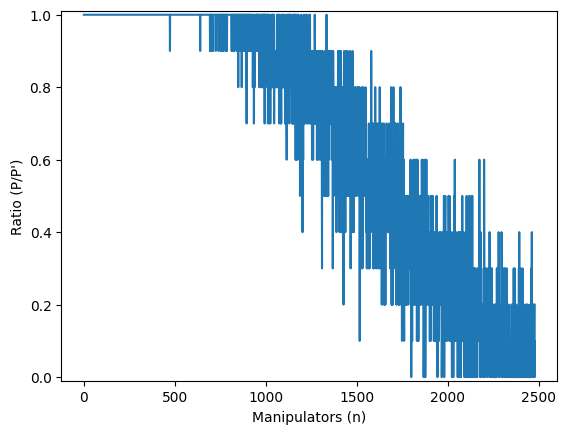

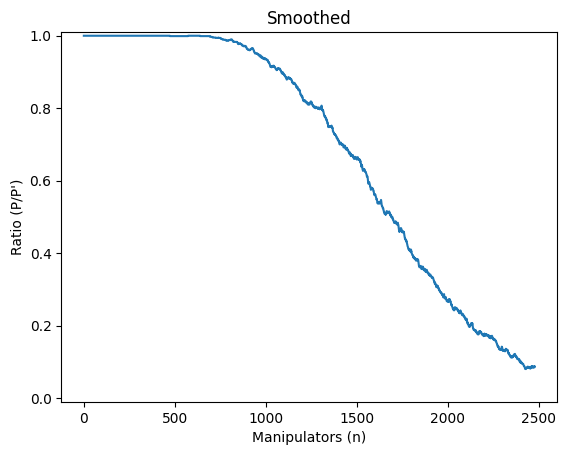

In [34]:
# DARW PLOTS
df = pd.read_csv('results_random_grid.csv')

proportions = df.groupby('n')['match'].mean()
proportions.plot(kind='line')
plt.xlabel('Manipulators (n)')
plt.ylabel("Ratio (P/P')")
plt.ylim(-0.01, 1.01)
plt.show()

smoothed_proportions = proportions.rolling(window=100, min_periods=1).mean()
smoothed_proportions.plot(kind='line')
plt.xlabel('Manipulators (n)')
plt.ylabel("Ratio (P/P')")
plt.ylim(-0.01, 1.01)
plt.title('Smoothed')
plt.show()

### RANDOM BINARY SEARCH
- Does a binary search for the smallest value of n that changes the result of the election.
- Adjust i to change the number of iterations for each value of n. 
- Much faster the run. 

In [ ]:
n = profile_length
i = 100

results_random_binary, profile_random_binary, n_random_binary = random_binary(original_profile, original_results, n, i)
csv_file_path = 'results_random_binary.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i'])
    writer.writerows(results_random_binary)

print("Results saved to {}".format(csv_file_path))

In [ ]:
print("P': SMALLEST n = {}\n".format(n_random_binary))

# Test the profile
election_random_binary = single_transferable_vote(profile_random_binary, candidate, print_status=True)
for result in election_random_binary[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], election_random_binary[1]))

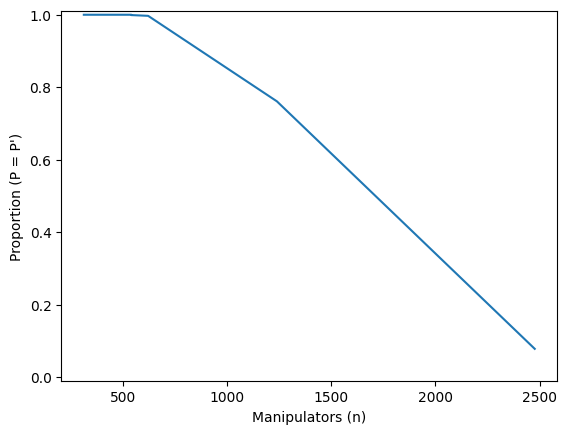

In [35]:
df = pd.read_csv('results_random_binary.csv')

proportions = df.groupby('n')['match'].mean()
proportions.plot(kind='line')
plt.xlabel('Manipulators (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(-0.01, 1.01)
plt.show()

### TARGETFRONT GRID SEARCH
- Places the target candidate to the first place position of n randomly chosen voters. 
- Search across all values of n. 
- Adjust i to change the number of iterations for each value of n. 
- Takes a long time to run. 

In [ ]:
n = profile_length
i = 3

results_targetfront_grid, profile_targetfront_grid, n_targetfront_grid  = targetfront_grid(original_profile, original_results, n, i)
csv_file_path = 'results_targetfront_grid.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results_targetfront_grid)

print("Results saved to {}".format(csv_file_path))

In [ ]:
print("P': SMALLEST n = {}\n".format(n_targetfront_grid))

# Test the profile
election_targetfront_grid = single_transferable_vote(profile_targetfront_grid, candidate, print_status=True)
for result in election_targetfront_grid[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], election_targetfront_grid[1]))

In [ ]:
df = pd.read_csv('results_targetfront_grid.csv')

proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

# Plot a line for each 'target'
for target in proportions.columns:
    plt.plot(proportions.index, proportions[target], label=f'Target {target}')

# Add labels and legend
plt.xlabel('Manipulators (n)')
plt.ylabel("Ratio (P/P')")
plt.ylim(-0.01, 1.01)
plt.show()

# Show the plot
plt.show()

smoothed_proportions = proportions.rolling(window=100, min_periods=1).mean()
smoothed_proportions.plot(kind='line')
plt.xlabel('Manipulators (n)')
plt.ylabel("Ratio (P/P')")
plt.ylim(-0.01, 1.01)
plt.title('Smoothed')
plt.show()

### TARGETFRONT BINARY SEARCH
- Places the target candidate to the first place position of n randomly chosen voters. 
- Does a binary search for smallest value of n that changes the result.  
- Adjust i to change the number of iterations for each value of n. 
- Much faster to run. 

In [29]:
n = profile_length
i = 100

results_targetfront_binary, profile_targetfront_binary, n_targetfront_binary, target_targetfront_binary = targetfront_binary(original_profile, original_results, n, i)
csv_file_path = 'results_targetfront_binary.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results_targetfront_binary)

print("Results saved to {}".format(csv_file_path))

SEARCHING: n = 2477, n_max = 2477, n_min = 0, i = 100, target = 0, 
SEARCHING: n = 1238, n_max = 2477, n_min = 0, i = 100, target = 0, 
SEARCHING: n = 619, n_max = 1238, n_min = 0, i = 100, target = 0, 
SEARCHING: n = 310, n_max = 619, n_min = 0, i = 100, target = 0, 
SEARCHING: n = 464, n_max = 619, n_min = 310, i = 100, target = 0, 
SEARCHING: n = 542, n_max = 619, n_min = 464, i = 100, target = 0, 
SEARCHING: n = 503, n_max = 542, n_min = 464, i = 100, target = 0, 
SEARCHING: n = 522, n_max = 542, n_min = 503, i = 100, target = 0, 
SEARCHING: n = 512, n_max = 522, n_min = 503, i = 100, target = 0, 
SEARCHING: n = 517, n_max = 522, n_min = 512, i = 100, target = 0, 
SEARCHING: n = 520, n_max = 522, n_min = 517, i = 100, target = 0, 
SEARCHING: n = 521, n_max = 522, n_min = 520, i = 100, target = 0, 
SEARCHING: n = 2477, n_max = 2477, n_min = 0, i = 100, target = 1, 
SEARCHING: n = 1238, n_max = 2477, n_min = 0, i = 100, target = 1, 
SEARCHING: n = 619, n_max = 1238, n_min = 0, i = 10

In [30]:
print("P': SMALLEST n: {} TARGET: {}\n".format(n_targetfront_binary, target_targetfront_binary))

# Test the profile
election_targetfront_binary = single_transferable_vote(profile_targetfront_binary, candidate, print_status=True)
for result in election_targetfront_binary[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], election_targetfront_binary[1]))

P': SMALLEST n: 88 TARGET: 4

---ROUND 1---
Tally: [240, 445, 401, 377, 408, 26, 94, 448, 38, 0, 0]
Eliminated [9, 10]:

---ROUND 2---
Tally: [240, 445, 401, 377, 408, 26, 94, 448, 38, None, None]
Eliminated [5]:

---ROUND 3---
Tally: [240, 449, 401, 386, 411, None, 96, 451, 41, None, None]
Eliminated [8]:

---ROUND 4---
Tally: [246, 453, 407, 388, 421, None, 100, 459, None, None, None]
Eliminated [6]:

---ROUND 5---
Tally: [254, 467, 419, 406, 439, None, None, 478, None, None, None]
Eliminated [0]:

---ROUND 6---
Tally: [None, 523, 453, 448, 499, None, None, 529, None, None, None]
Eliminated [3]:

---ROUND 7---
Tally: [None, 658, 517, None, 596, None, None, 622, None, None, None]
Eliminated [2]:

---ROUND 8---
Tally: [None, 721, None, None, 722, None, None, 860, None, None, None]
Eliminated [1]:

---ROUND 9---
Tally: [None, None, None, None, 1038, None, None, 1037, None, None, None]
Eliminated [7]:

---ROUND 10---
Tally: [None, None, None, None, 1627, None, None, None, None, None, Non

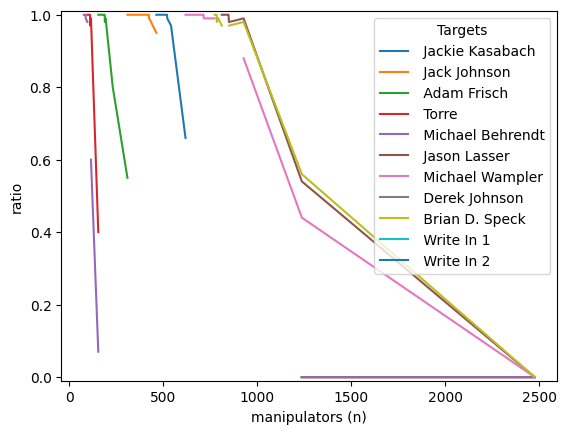

In [31]:
df = pd.read_csv('results_targetfront_binary.csv')

proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

# plot a line for each 'target'
plt.figure()
for target in proportions.columns:
    target_name = candidate[int(target)]
    plt.plot(proportions.index, proportions[target], label=f' {target_name}')

# Add labels and legend
plt.xlabel('manipulators (n)')
plt.ylabel("ratio")
plt.ylim(-0.01, 1.01)
plt.legend(title='Targets')

### TARGETFRONT BINARY SPECIFIC
- Search the area around the smallest n found with higher i.

In [36]:
n = 88
i = 10000
target = 4

results_targetfront_binary_specific, profile_targetfront_binary_specific, n_targetfront_binary_specific, target_targetfront_binary_specific = targetfront_binary_specific(original_profile, original_results, n, i, target)
csv_file_path = 'results_targetfront_binary_specific.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results_targetfront_binary_specific)

print("Results saved to {}".format(csv_file_path))

SEARCHING: n = 88, n_max = 88, n_min = 0, i = 10000, target = 4, 
SEARCHING: n = 44, n_max = 88, n_min = 0, i = 10000, target = 4, 
SEARCHING: n = 66, n_max = 88, n_min = 44, i = 10000, target = 4, 
SEARCHING: n = 55, n_max = 66, n_min = 44, i = 10000, target = 4, 
SEARCHING: n = 60, n_max = 66, n_min = 55, i = 10000, target = 4, 
SEARCHING: n = 63, n_max = 66, n_min = 60, i = 10000, target = 4, 
SEARCHING: n = 62, n_max = 63, n_min = 60, i = 10000, target = 4, 
Results saved to results_targetfront_binary_specific.csv


In [37]:
print("P': SMALLEST n: {} TARGET: {}\n".format(n_targetfront_binary_specific, target_targetfront_binary_specific))

# Test the profile
election_targetfront_binary_specific = single_transferable_vote(profile_targetfront_binary_specific, candidate, print_status=True)
for result in election_targetfront_binary_specific[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], election_targetfront_binary_specific[1]))

P': SMALLEST n: 63 TARGET: 4

---ROUND 1---
Tally: [240, 438, 406, 379, 404, 27, 97, 448, 38, 0, 0]
Eliminated [9, 10]:

---ROUND 2---
Tally: [240, 438, 406, 379, 404, 27, 97, 448, 38, None, None]
Eliminated [5]:

---ROUND 3---
Tally: [240, 442, 407, 388, 407, None, 99, 451, 41, None, None]
Eliminated [8]:

---ROUND 4---
Tally: [246, 446, 413, 390, 417, None, 103, 459, None, None, None]
Eliminated [6]:

---ROUND 5---
Tally: [254, 460, 425, 410, 436, None, None, 478, None, None, None]
Eliminated [0]:

---ROUND 6---
Tally: [None, 514, 459, 452, 498, None, None, 529, None, None, None]
Eliminated [3]:

---ROUND 7---
Tally: [None, 651, 526, None, 595, None, None, 621, None, None, None]
Eliminated [2]:

---ROUND 8---
Tally: [None, 715, None, None, 725, None, None, 863, None, None, None]
Eliminated [1]:

---ROUND 9---
Tally: [None, None, None, None, 1039, None, None, 1036, None, None, None]
Eliminated [7]:

---ROUND 10---
Tally: [None, None, None, None, 1621, None, None, None, None, None, Non

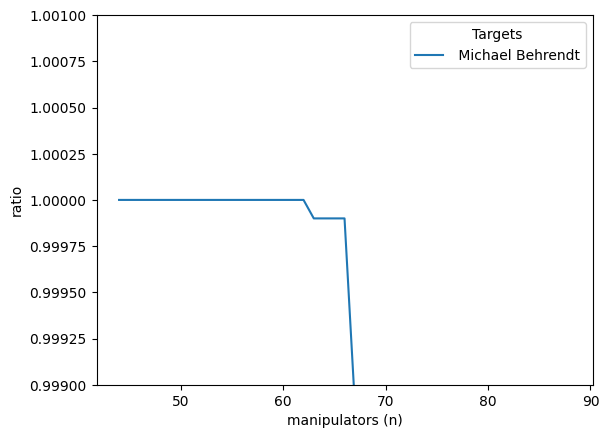

In [38]:
df = pd.read_csv('results_targetfront_binary_specific.csv')

proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

# plot a line for each 'target'
plt.figure()
for target in proportions.columns:
    target_name = candidate[int(target)]
    plt.plot(proportions.index, proportions[target], label=f' {target_name}')

# Add labels and legend
plt.xlabel('manipulators (n)')
plt.ylabel("ratio")
plt.ylim(0.999, 1.001)
plt.legend(title='Targets')

### TARGETBACK GRID SEARCH 
- Places the target candidate to the last place position of n randomly chosen voters. 
- Search across all values of n. 
- Adjust i to change the number of iterations for each value of n. 
- Takes a long time to run. 

In [ ]:
n = profile_length
i = 10

results_targetback_grid, profile_targetback_grid, n_targetback_grid, target_targetback_binary= targetback_grid(original_profile, original_results, n, i)
csv_file_path = 'results_targetback_grid.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results_targetback_grid)

print("Results saved to {}".format(csv_file_path))

In [ ]:
print("P': SMALLEST n: {} TARGET: {}\n".format(n_targetback_grid, target_targetback_binary))

# Test the profile
election_targetback_grid = single_transferable_vote(profile_targetback_grid, candidate, print_status=True)
for result in election_targetback_grid[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], election_targetback_grid[1]))

In [ ]:
df = pd.read_csv('results_targetback_grid.csv')

proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

# Plot a line for each 'target'
for target in proportions.columns:
    plt.plot(proportions.index, proportions[target], label=f'Target {target}')

# Add labels and legend
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion of True")
plt.ylim(0, 1.01)
plt.legend(title='Targets')

# Show the plot
plt.show()

smoothed_proportions = proportions.rolling(window=100, min_periods=1).mean()
smoothed_proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.title('Smoothed')
plt.show()

### TARGET BACK BINARY SEARCH
- Places the target candidate to the last place position of n randomly chosen voters. 
- Does a binary search for smallest value of n that changes the result.  
- Adjust i to change the number of iterations for each value of n. 
- Much faster the run. 

In [ ]:
n = profile_length
i = 100

results_targetback_binary, profile_targetback_binary, n_targetback_binary, target_targetback_binary = targetback_binary(original_profile, original_results, n, i)
csv_file_path = 'results_targetback_binary.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results_targetback_binary)

print("Results saved to {}".format(csv_file_path))

In [ ]:
print("P': SMALLEST n: {} TARGET: {}\n".format(n_targetback_binary, target_targetback_binary))

# Test the profile
election_targetback_binary = single_transferable_vote(profile_targetback_binary, candidate, print_status=True)
for result in election_targetback_binary[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], election_targetback_binary[1]))

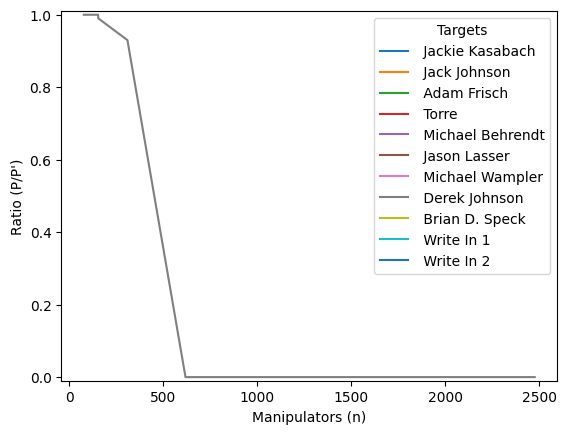

In [36]:
df = pd.read_csv('results_targetback_binary.csv')

proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

# plot a line for each 'target'
plt.figure()
for target in proportions.columns:
    target_name = candidate[int(target)]
    plt.plot(proportions.index, proportions[target], label=f' {target_name}')

# Add labels and legend
plt.xlabel('Manipulators (n)')
plt.ylabel("Ratio (P/P')")
plt.ylim(-0.01, 1.01)
plt.legend(title='Targets')